In [40]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files
fil = files.upload()

Saving delivery_time.csv to delivery_time.csv


**dt = delivery_time over here**

In [7]:
dt = pd.read_csv("delivery_time.csv")
dt.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


# Execusion of EDA

In [8]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [9]:
dt.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [10]:
dt[dt.duplicated()]

,Delivery Time,Sorting Time


In [11]:
dt.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


# ***Visualization***

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Sorting Time')

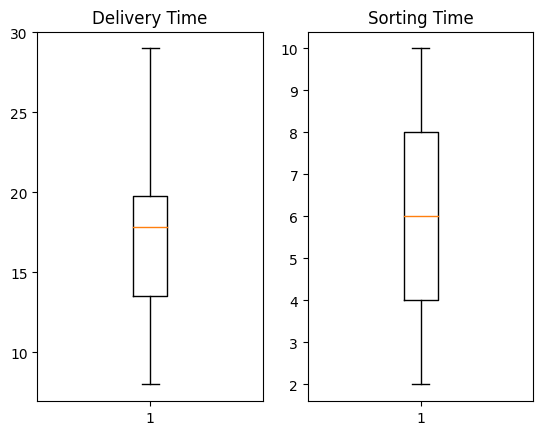

In [15]:
plt.subplot(121)
plt.boxplot(dt['Delivery Time'])
plt.title('Delivery Time')
plt.subplot(122)
plt.boxplot(dt['Sorting Time'])
plt.title('Sorting Time')

**Corelation check**

In [16]:
dt.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


In [19]:
dt.var()

Delivery Time    25.754619
Sorting Time      6.461905
dtype: float64

<Axes: xlabel='Delivery Time', ylabel='Sorting Time'>

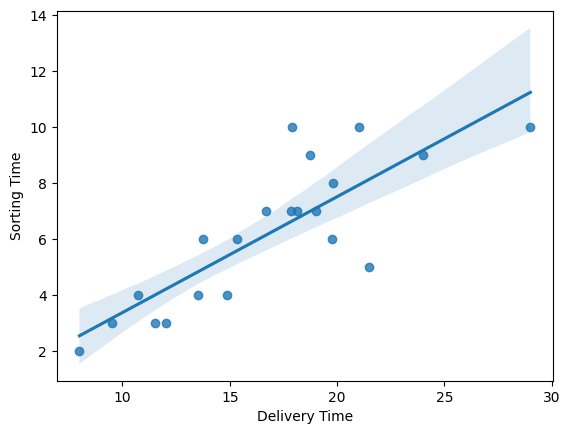

In [17]:
sns.regplot(x=dt['Delivery Time'],y=dt['Sorting Time'])

**Checking for Homoscedasticity or Hetroscedasticity**

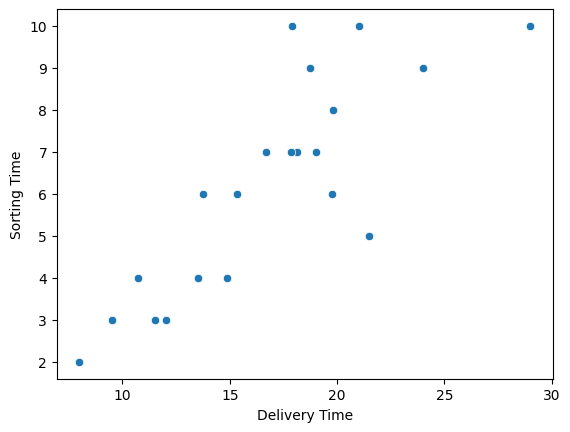

In [18]:
sns.scatterplot(x=dt['Delivery Time'],y=dt['Sorting Time'])
plt.show()

* We can get Sorting Time Increases Delivery Time also increases.
* But, it's also nor Homoscedastic too.

# **Trying Transformation**

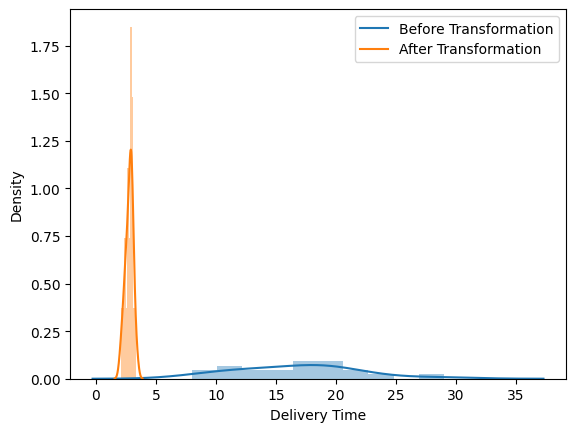

In [32]:
labels = ['Before Transformation','After Transformation']
sns.distplot(dt['Delivery Time'], bins = 10, kde = True)
sns.distplot(np.log(dt['Delivery Time']), bins = 10, kde = True)
plt.legend(labels)

Text(0.5, 1.0, 'No transformation')

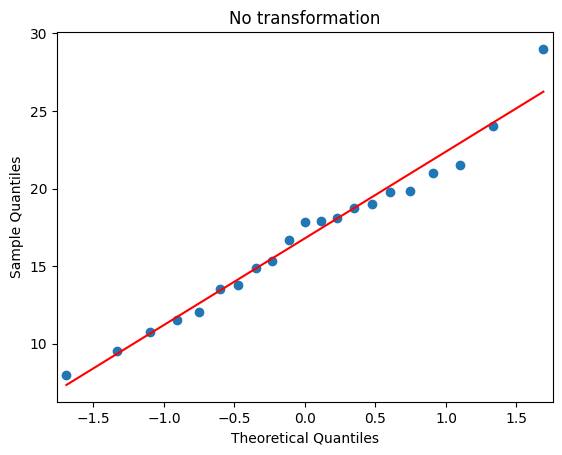

In [28]:
import statsmodels.api as smf
smf.qqplot(dt['Delivery Time'], line = 'r')
plt.title('No transformation')

Text(0.5, 1.0, 'Log transformation')

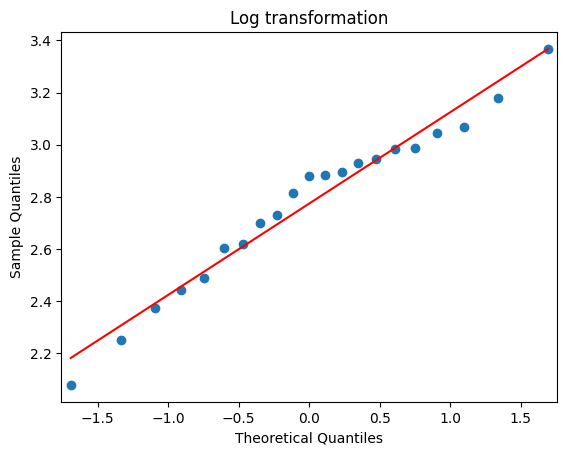

In [29]:
smf.qqplot(np.log(dt['Delivery Time']), line = 'r')
plt.title('Log transformation')


Log transformation affects the data and it scales the values down.

Text(0.5, 1.0, 'Square root transformation')

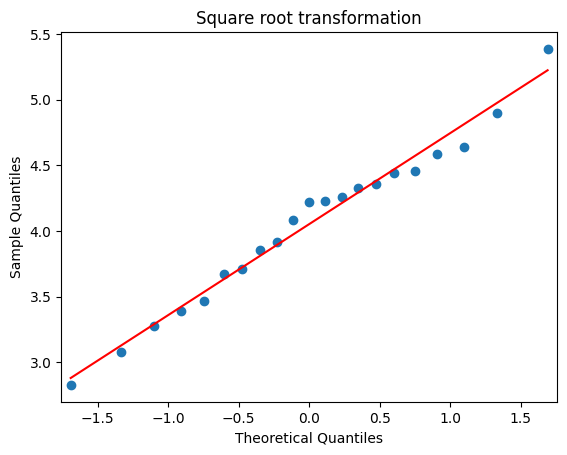

In [30]:
smf.qqplot(np.sqrt(dt['Delivery Time']), line = 'r')
plt.title('Square root transformation')

Text(0.5, 1.0, 'Cube root transformation')

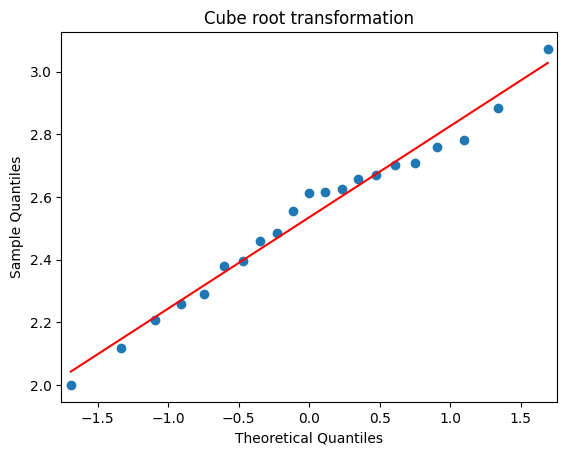

In [31]:
smf.qqplot(np.cbrt(dt['Delivery Time']), line = 'r')
plt.title('Cube root transformation')

As log transformation affect the data we included log values

In [56]:
dt['Sorting Time log'] = np.log2(dt['Sorting Time'])

# Implementing Linear Regression Model

Using OLS

In [57]:
dt1 = dt.rename({'Delivery Time':'Delivery_Time','Sorting Time log':'Sorting_Time_log'}, axis = 1)
dt1.sample()

,Delivery_Time,Sorting Time,Sorting_Time_log
9,18.75,9,3.169925


In [58]:
import statsmodels.formula.api as smf

In [60]:
model = smf.ols('Delivery_Time~Sorting_Time_log',data=dt1).fit()
model.params

Intercept           1.159684
Sorting_Time_log    6.268417
dtype: float64

In [61]:
test = dt1.sample(1)

In [62]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Thu, 21 Dec 2023   Prob (F-statistic):           2.64e-06
Time:                        15:22:36   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.1597      2.455      0.472      0.642      -3.978       6.297
Sorting_Time_log     6.2684      0.952      6.587      0.000       4.277       8.260
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         11.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
model.predict(test)

18    7.4281
dtype: float64